In [1]:

import pandas as pd
import talib
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the CSV file
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\AAPL_historical_data.csv')
print(df.columns)



Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Dividends', 'Stock Splits'],
      dtype='object')


In [9]:
# Remove rows with NaN values from all columns
df_cleaned = df.dropna()

# Save the cleaned data to a new CSV file
df_cleaned.to_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\AAPL_historical_data_cleaned.csv', index=False)

# Load the cleaned data
df = pd.read_csv(r'C:\Users\medha\OneDrive\Desktop\Week1_Talib\data\AAPL_historical_data_cleaned.csv')

# Calculate a TA-Lib indicator Simple Moving Average
df['SMA'] = talib.SMA(df['Close'], timeperiod=200)  # 200 days

# Calculate a TA-Lib indicator Relative Strength Index
df['RSI'] = talib.RSI(df['Close'], timeperiod=200)  # 200 days

# Calculate MACD
df['MACD'], df['MACD_Signal'], df['MACD_Hist'] = talib.MACD(df['Close'], 
                                                               fastperiod=12, 
                                                               slowperiod=26, 
                                                               signalperiod=9)

# Remove rows with NaN values after calculations
df = df.dropna()

# Display the last few rows of the DataFrame
print(df[['Close', 'SMA', 'RSI', 'MACD', 'MACD_Signal', 'MACD_Hist']])

            Close         SMA        RSI      MACD  MACD_Signal  MACD_Hist
200      0.067522    0.117821  45.206626 -0.007814    -0.006631  -0.001183
201      0.068080    0.117553  45.255014 -0.007732    -0.006851  -0.000881
202      0.068080    0.117330  45.255014 -0.007579    -0.006997  -0.000583
203      0.073661    0.117120  45.739106 -0.006928    -0.006983   0.000055
204      0.075893    0.116906  45.931278 -0.006161    -0.006819   0.000657
...           ...         ...        ...       ...          ...        ...
10993  218.539993  188.122350  54.698178  4.662717     6.678882  -2.016164
10994  217.490005  188.322350  54.558096  3.748082     6.092722  -2.344640
10995  217.960007  188.517200  54.610391  3.026267     5.479431  -2.453164
10996  218.240005  188.716450  54.641643  2.448591     4.873263  -2.424672
10997  218.800003  188.911450  54.704333  2.012764     4.301163  -2.288399

[10798 rows x 6 columns]


In [9]:
# Display the first few rows of the DataFrame
print("Historical Data:")
print(df.head())


Historical Data:
         Date      Open      High       Low     Close  Adj Close     Volume  \
0  1980-12-12  0.128348  0.128906  0.128348  0.128348   0.098943  469033600   
1  1980-12-15  0.122210  0.122210  0.121652  0.121652   0.093781  175884800   
2  1980-12-16  0.113281  0.113281  0.112723  0.112723   0.086898  105728000   
3  1980-12-17  0.115513  0.116071  0.115513  0.115513   0.089049   86441600   
4  1980-12-18  0.118862  0.119420  0.118862  0.118862   0.091630   73449600   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [15]:
# Create a Ticker object for AAPL
ticker = yf.Ticker("AAPL")

In [16]:
# Get financial statements
financials = ticker.financials
print("\nFinancials:")
print(financials)


Financials:
                                                        2023-09-30  \
Tax Effect Of Unusual Items                                    0.0   
Tax Rate For Calcs                                           0.147   
Normalized EBITDA                                   129188000000.0   
Net Income From Continuing Operation Net Minori...   96995000000.0   
Reconciled Depreciation                              11519000000.0   
Reconciled Cost Of Revenue                          214137000000.0   
EBITDA                                              129188000000.0   
EBIT                                                117669000000.0   
Net Interest Income                                   -183000000.0   
Interest Expense                                      3933000000.0   
Interest Income                                       3750000000.0   
Normalized Income                                    96995000000.0   
Net Income From Continuing And Discontinued Ope...   96995000000.0   
Total E

In [12]:
# Get the balance sheet
balance_sheet = ticker.balance_sheet
print("\nBalance Sheet:")
print(balance_sheet)


Balance Sheet:
                                                      2023-09-30  \
Treasury Shares Number                                       0.0   
Ordinary Shares Number                             15550061000.0   
Share Issued                                       15550061000.0   
Net Debt                                           81123000000.0   
Total Debt                                        123930000000.0   
...                                                          ...   
Cash Cash Equivalents And Short Term Investments   61555000000.0   
Other Short Term Investments                       31590000000.0   
Cash And Cash Equivalents                          29965000000.0   
Cash Equivalents                                    1606000000.0   
Cash Financial                                     28359000000.0   

                                                      2022-09-30  \
Treasury Shares Number                                       NaN   
Ordinary Shares Number         

In [13]:
# Get the cash flow statement
cash_flow = ticker.cashflow
print("\nCash Flow Statement:")
print(cash_flow)


Cash Flow Statement:
                                                    2023-09-30  \
Free Cash Flow                                   99584000000.0   
Repurchase Of Capital Stock                     -77550000000.0   
Repayment Of Debt                               -11151000000.0   
Issuance Of Debt                                  5228000000.0   
Issuance Of Capital Stock                                  NaN   
Capital Expenditure                             -10959000000.0   
Interest Paid Supplemental Data                   3803000000.0   
Income Tax Paid Supplemental Data                18679000000.0   
End Cash Position                                30737000000.0   
Beginning Cash Position                          24977000000.0   
Changes In Cash                                   5760000000.0   
Financing Cash Flow                            -108488000000.0   
Cash Flow From Continuing Financing Activities -108488000000.0   
Net Other Financing Charges                      -6012

In [3]:
# Ensure the 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set the 'Date' as the index
df.set_index('Date', inplace=True)

In [4]:
# Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

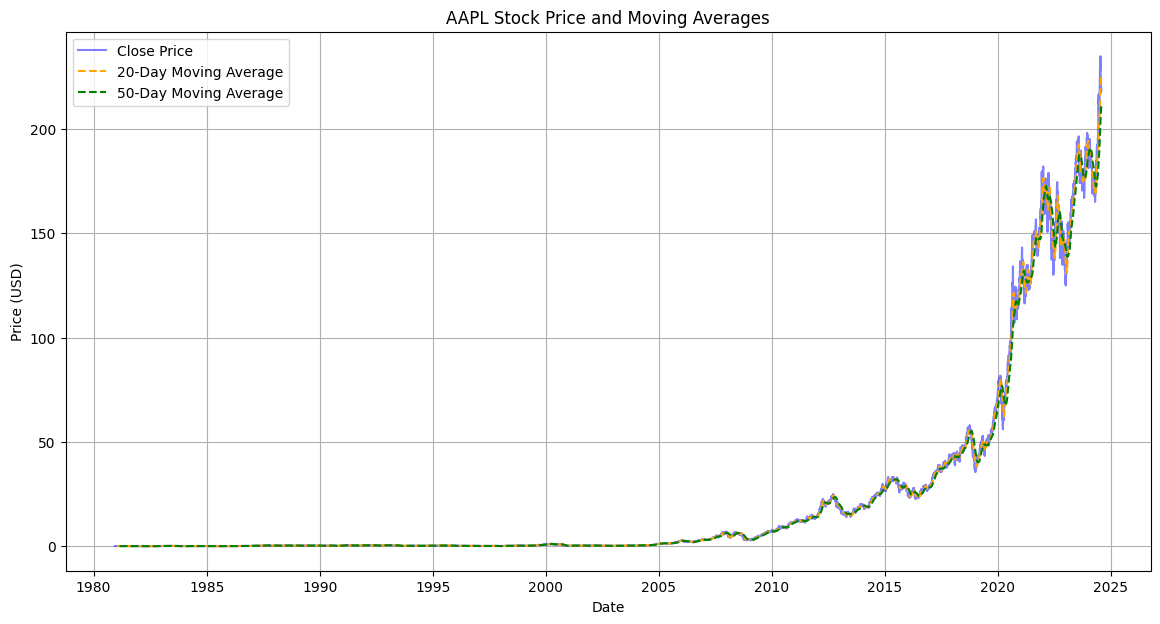

In [5]:
# Plotting
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Close Price', color='blue', alpha=0.5)
plt.plot(df['MA20'], label='20-Day Moving Average', color='orange', linestyle='--')
plt.plot(df['MA50'], label='50-Day Moving Average', color='green', linestyle='--')

plt.title('AAPL Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid()
plt.show()